In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:,3:13].values
X
#

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [4]:
y=dataset.iloc[:,13].values
type(y)
y

array([1, 0, 1, ..., 1, 1, 0])

In [5]:
#importing the relevant libraries from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder#pass on the functionality of the library LabelEncoder to another variable
labelencoder = LabelEncoder()
X[:,2] = labelencoder.fit_transform(X[:,2])
X
#the next step is to label encode the geography
X[:,1] = labelencoder.fit_transform(X[:,1])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [6]:
#get the library from sklearn.compose
from sklearn.compose import ColumnTransformer
#onehot encoder has been applied to column 1
#I have given the column transfer function a name of my choice which is choice
#the functionality has been passed on =to the variable ct but still not appplied on the data
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
# we shall now apply it on the data
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [7]:
X = pd.DataFrame(X, columns = ["X1", "X2", "X3", "Credit Score","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [8]:
#from the dataframe drop X1 (randomly)
#axis = 1 indicates where should python look for the variable X1
X = X.drop("X1", axis = 1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
#feature scaling
#to standardize the data get the standard scaler functuin from sklean,preprocessing
from sklearn.preprocessing import StandardScaler
#pass on the funcionality to a new variable called sc
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#the model is trained to recognize the mean and standard deviation of train data
#if it is working properly the test data using the mean and standard deviation of train data
X_test = sc.transform(X_test)

In [ ]:
import statsmodels.api as sm
#fitting logistic regressio to the training dataset
X_train = sm.add_constant(X_train)
classifier = sm.Logit(y_train,X_train)
#statsmodel in pythin forgets to add the constant
#this is a violation of gauss markov property
# the constant has to be added seperately
model = classifier.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.429005
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.1520
Time:                        13:19:56   Log-Likelihood:                -3432.0
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                4.787e-257
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6472      0.034    -47.855      0.000      -1.715      -1.580
x1             0.3563      0.033     10.900      0.000       0.292       0.420
x2             0.0484      0.034      1.435      0.151      -0.018       0.115
x3            -0.0724      0.030     -2.390      0.017      -0.132      -0.013
x4            -0.2695      0.030     -8.888      0.000      -0.329      -0.210
x5             0.7526      0.030     25.037      0.000       0.694       0.811
x6            -0.0814      0.030     -2.694      0.007      -0.141      -0.022
x7             0.1537      0.036      4.283      0.000       0.083       0.224
x8            -0.0848      0.031     -2.747      0.006      -0.145      -0.024
x9            -0.0237      0.030     -0.786      0.432      -0.083       0.035
x10           -0.5189      0.032    -16.205      0.000      -0.582      -0.456
x11            0.0292      0.030      0.960      0.337      -0.030       0.089
==============================================================================
"""

In [ ]:
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)
y_pred

array([0.2082023 , 0.34456888, 0.14477539, ..., 0.20103981, 0.12562586,
       0.2332761 ])

Accuracy: 0.811


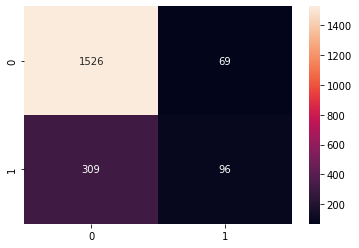

In [ ]:
import seaborn as sns
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

In [11]:
#importing the keras libraries and packages
import keras
#sequential because the model has all layers in a sequence
from keras.models import Sequential
#dense implies hidden layers which we cannot access from outside
#zthese are built in keras functions
from keras.layers import Dense
#initialising the deep learning model
classifier = Sequential()
#adding the input layer
#input dimensions = 11
#the first hidden layer has 6 units, weights are taken randomly from an uniform distribution
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#adding th eoutput layer
#here the activation function is a sigmoid as it is a binary classification problems
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting the DNN to the training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4776 - accuracy: 0.7959
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4226 - accuracy: 0.7966
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4185 - accuracy: 0.8245
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8291
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4141 - accuracy: 0.8306
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4126 - accuracy: 0.8320
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4119 - accuracy: 0.8326
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4105 - accuracy: 0.8329
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4101 - accura

In [12]:
from sklearn import metrics
i = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
accuracy = []
for cutoff in i:
  y_pred = (classifier.predict(X_test) > cutoff)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

accuracy

[0.3585,
 0.5265,
 0.644,
 0.726,
 0.78,
 0.805,
 0.8265,
 0.8355,
 0.847,
 0.8415,
 0.837,
 0.8375,
 0.834,
 0.828,
 0.82,
 0.815,
 0.8115,
 0.7975,
 0.7975,
 0.7975]

Accuracy: 0.8415


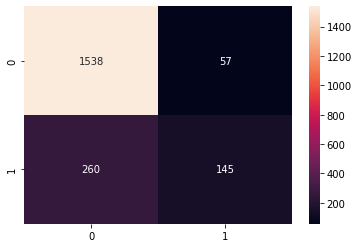

In [13]:
import seaborn as sns
from sklearn import metrics
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

In [14]:
# New Customer
# Geography: France (0,0)
# Credit Score: 600
# Gender: Male (1)
# Age: 40 years old
# Tenure: 3 years
# Balance: $60000
# Number of Products: 2
# Does this customer have a credit card ? Yes (1)
# Is this customer an Active Member: Yes (1)
# Estimated Salary: $50000
# Predict the class of this customer

#the brackets for a numpy array in python is ([])
#so why are we using ([[]]) this?
#we need to transpose the data from horizontal to vertical
new_customer = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
new_prediction=(new_customer>0.5)
new_prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[False]])

In [ ]:
#evaluating the DNN
#load all the relevant livraries
#the new ones are mentioned cross_val_score
#kerasclassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

#essentially you are copying and pasting the code/
def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
                             #cv = cross validation; n_jobs = 1: single threadding, -1: multithreadding
mean = accuracies.mean()
Variance = accuracies.std()

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


720/720 [==============================] - 2s 2ms/step - loss: 0.4821 - accuracy: 0.7964
Epoch 2/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4252 - accuracy: 0.7971
Epoch 3/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4221 - accuracy: 0.7971
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.8174
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8200
Epoch 6/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8196
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.8240
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8261
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8283
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8306
E

In [17]:
#tuning the DNN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [30],
              'epochs': [200],
          'optimizer':  ['adadelta', 'sgd']}

# grid search object has to be created and data has to be fitted on it
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

#fitting the data in the grid_search.object
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


Streaming output truncated to the last 5000 lines.
240/240 [==============================] - 1s 2ms/step - loss: 0.6689 - accuracy: 0.7957
Epoch 102/200
240/240 [==============================] - 1s 2ms/step - loss: 0.6686 - accuracy: 0.7957
Epoch 103/200
240/240 [==============================] - 1s 2ms/step - loss: 0.6684 - accuracy: 0.7957
Epoch 104/200
240/240 [==============================] - 1s 3ms/step - loss: 0.6681 - accuracy: 0.7957
Epoch 105/200
240/240 [==============================] - 1s 2ms/step - loss: 0.6678 - accuracy: 0.7957
Epoch 106/200
240/240 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.7957
Epoch 107/200
240/240 [==============================] - 1s 2ms/step - loss: 0.6673 - accuracy: 0.7957
Epoch 108/200
240/240 [==============================] - 1s 2ms/step - loss: 0.6671 - accuracy: 0.7957
Epoch 109/200
240/240 [==============================] - 1s 2ms/step - loss: 0.6668 - accuracy: 0.7957
Epoch 110/200
240/240 [=============

In [18]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)

{'batch_size': 30, 'epochs': 200, 'optimizer': 'sgd'}
0.8585
